In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



### Aggregating df_new so that each column has a 0.25s interval

### Combining Accelerometer and Gyroscope df_newsets Horizontally and then Vertically

### Converting datetime format to hours minutes and seconds

In [2]:
# read csv file named dataset.csv
df = pd.read_csv('dataset.csv')

In [3]:
df

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Genre,BPM
0,00:00:00.000000,-1.563384,3.703485,8.927862,-0.269163,-0.215996,0.037011,rock,173
1,00:00:00.250000,-0.832034,2.618059,9.157848,-0.275456,0.300962,-0.007585,rock,173
2,00:00:00.500000,-1.978007,2.809231,9.223699,-0.055587,-0.296234,-0.348594,rock,173
3,00:00:00.750000,-1.394112,1.944860,9.228296,0.187295,-0.638973,-0.304613,rock,173
4,00:00:01.000000,1.404846,2.322332,9.494185,0.267072,-1.329970,0.142612,rock,173
...,...,...,...,...,...,...,...,...,...
18624,00:14:00.250000,1.402597,4.288324,8.840542,0.099436,0.289380,0.141558,lofi,79
18625,00:14:00.500000,0.938983,4.361283,8.856370,0.072526,0.093060,0.003982,lofi,79
18626,00:14:00.750000,0.639292,4.480020,8.736529,0.043741,0.137521,-0.010292,lofi,79
18627,00:14:01.000000,0.653660,4.503643,8.486324,-0.072902,0.008056,-0.034407,lofi,79


In [4]:
df.shape

(18629, 9)

In [5]:
df.isnull().sum()

Time (s)                  0
Acceleration x (m/s^2)    0
Acceleration y (m/s^2)    0
Acceleration z (m/s^2)    0
Gyroscope x (rad/s)       0
Gyroscope y (rad/s)       0
Gyroscope z (rad/s)       0
Genre                     0
BPM                       0
dtype: int64

In [6]:
# check df_new types
df.dtypes

Time (s)                   object
Acceleration x (m/s^2)    float64
Acceleration y (m/s^2)    float64
Acceleration z (m/s^2)    float64
Gyroscope x (rad/s)       float64
Gyroscope y (rad/s)       float64
Gyroscope z (rad/s)       float64
Genre                      object
BPM                         int64
dtype: object

In [7]:
df.describe(include='object')

,Time (s),Genre
count,18629,18629
unique,4252,5
top,00:00:00.000000,jazz
freq,5,4252


In [8]:
df.describe()

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),BPM
count,18629.000000,18629.000000,18629.000000,18629.000000,18629.000000,18629.000000,18629.000000
mean,3.800800,1.858437,3.779061,0.012354,0.010672,0.042730,115.971550
std,5.710247,6.266716,5.513403,1.755464,1.491357,1.769321,31.594765
min,-21.573309,-35.354150,-23.271866,-12.112553,-12.139550,-10.480836,62.000000
25%,0.200358,-1.405110,0.531667,-0.698815,-0.587539,-0.707002,94.000000
50%,3.726487,2.943523,3.755729,0.002162,0.008327,0.021920,119.000000
75%,7.587721,6.482743,7.661830,0.718192,0.651966,0.790541,128.000000
max,32.077082,22.583202,35.132009,11.186672,8.256840,9.795403,186.000000


In [9]:
df['Acceleration Net'] = (df['Acceleration x (m/s^2)']**2 + df['Acceleration y (m/s^2)']**2 + df['Acceleration z (m/s^2)']**2)**0.5
df['Gyro Net'] = (df['Gyroscope x (rad/s)']**2 + df['Gyroscope y (rad/s)']**2 + df['Gyroscope z (rad/s)']**2)**0.5

Text(0.5, 1.0, 'Net acceleration over time for each genre')

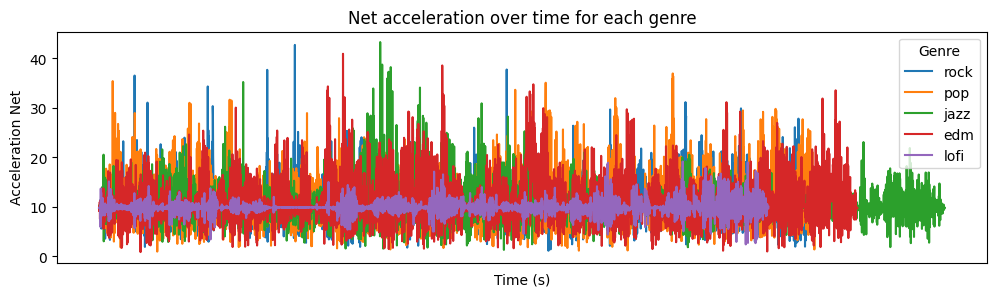

In [10]:
plt.figure(figsize=(12, 3))
sns.lineplot(x=df['Time (s)'], y=df['Acceleration Net'], hue=df['Genre'])
plt.xticks([])
plt.gca().set_xticklabels([])
plt.title('Net acceleration over time for each genre')

Text(0.5, 1.0, 'Net angular velocity over time for each genre')

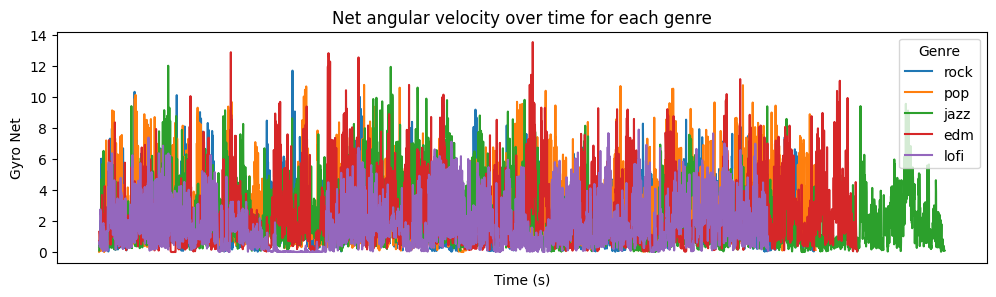

In [11]:
plt.figure(figsize=(12, 3))
sns.lineplot(x=df['Time (s)'], y=df['Gyro Net'], hue=df['Genre'])
plt.xticks([])
plt.gca().set_xticklabels([])
plt.title('Net angular velocity over time for each genre')

In [34]:
df.columns

Index(['Time (s)', 'Acceleration x (m/s^2)', 'Acceleration y (m/s^2)',
       'Acceleration z (m/s^2)', 'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)',
       'Gyroscope z (rad/s)', 'Genre', 'BPM', 'Acceleration Net', 'Gyro Net'],
      dtype='object')

In [37]:
# describe df with rounded 2 decimals
df.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
Acceleration x (m/s^2),18629.0,3.80,5.71,-21.57,0.20,3.73,7.59,32.08
Acceleration y (m/s^2),18629.0,1.86,6.27,-35.35,-1.41,2.94,6.48,22.58
Acceleration z (m/s^2),18629.0,3.78,5.51,-23.27,0.53,3.76,7.66,35.13
Gyroscope x (rad/s),18629.0,0.01,1.76,-12.11,-0.70,0.00,0.72,11.19
Gyroscope y (rad/s),18629.0,0.01,1.49,-12.14,-0.59,0.01,0.65,8.26
Gyroscope z (rad/s),18629.0,0.04,1.77,-10.48,-0.71,0.02,0.79,9.80
BPM,18629.0,115.97,31.59,62.00,94.00,119.00,128.00,186.00
Acceleration Net,18629.0,10.87,4.03,0.86,8.82,9.99,12.27,43.31
Gyro Net,18629.0,2.23,1.86,0.00,0.85,1.72,3.13,13.52


Text(0.5, 1.0, 'Mean angular velocity for each genre')

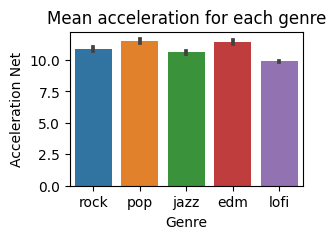

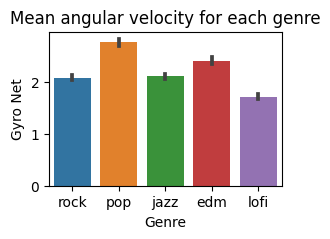

In [12]:
plt.figure(figsize=(3, 2))
sns.barplot(x=df['Genre'], y=df['Acceleration Net'])
plt.title('Mean acceleration for each genre')

plt.figure(figsize=(3, 2))
sns.barplot(x=df['Genre'], y=df['Gyro Net'])
plt.title('Mean angular velocity for each genre')


Text(0.5, 1.0, 'Mean BPM for each genre')

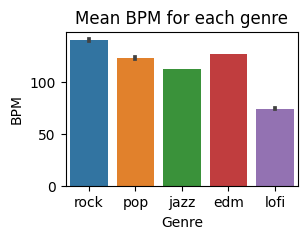

In [13]:
# mean BPM for each genre

plt.figure(figsize=(3, 2))
sns.barplot(x=df['Genre'], y=df["BPM"])
plt.title('Mean BPM for each genre')



/var/folders/g0/vt46_r791hs_69nxfq419_ch0000gn/T/ipykernel_34522/600454762.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dftest.drop('BPM', axis=1).corr(), annot=False, cmap='coolwarm')


Text(0.5, 1.0, 'Correlation between numerical features heatmap except BPM')

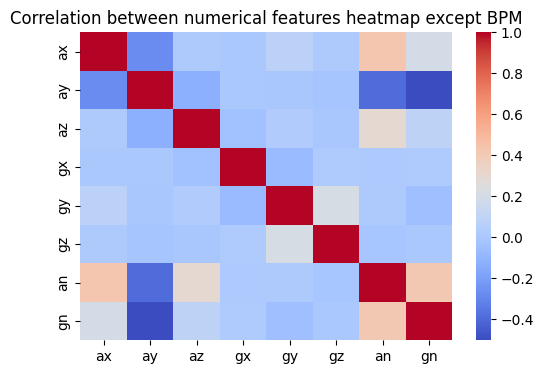

In [14]:
# correlation between numerical features heatmap except BPM
# replace  the label with ax for acceleration x, ay for acceleration y, az for acceleration z, gx for gyroscope x, gy for gyroscope y, gz for gyroscope z, an for acceleration net, gn for gyroscope net

dftest = df.copy()
dftest.columns = ['Time (s)', 'ax', 'ay', 'az', 'gx', 'gy', 'gz', 'Genre', 'BPM', 'an', 'gn']

plt.figure(figsize=(6, 4))
sns.heatmap(dftest.drop('BPM', axis=1).corr(), annot=False, cmap='coolwarm')
plt.title('Correlation between numerical features heatmap except BPM')


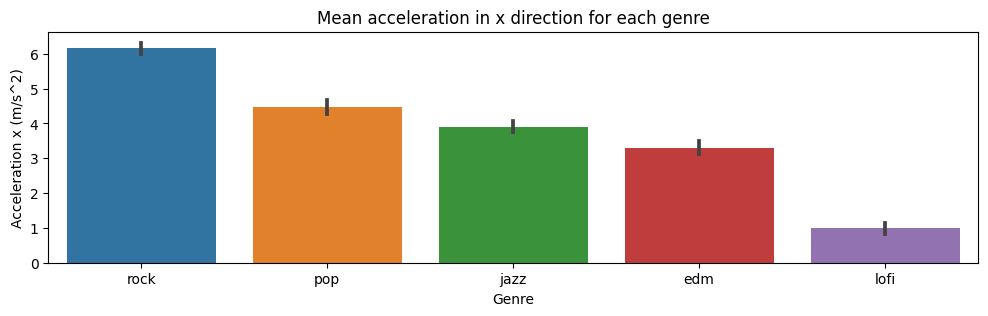

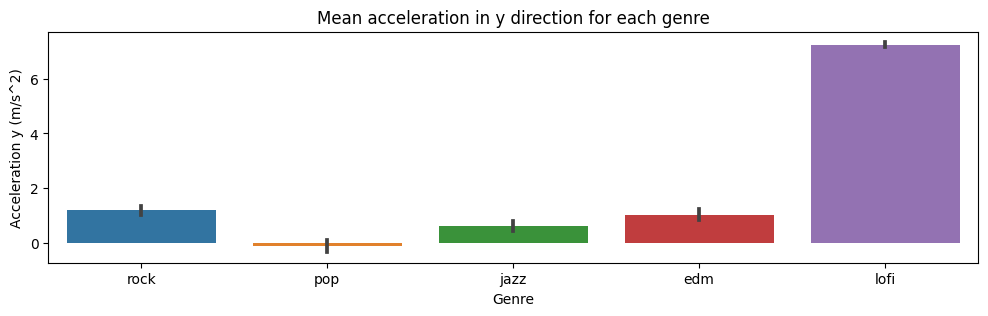

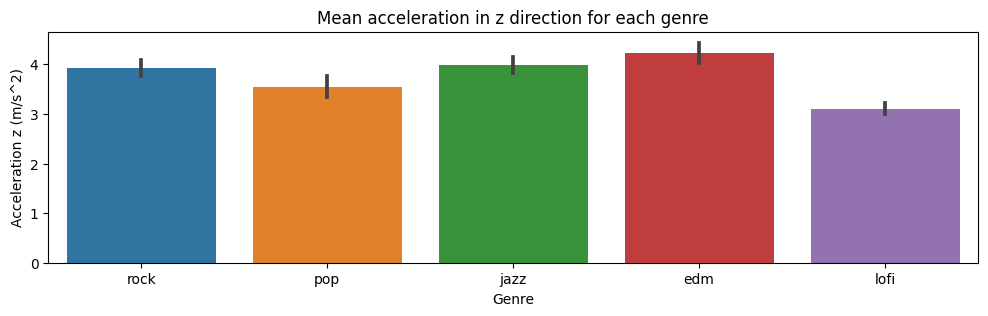

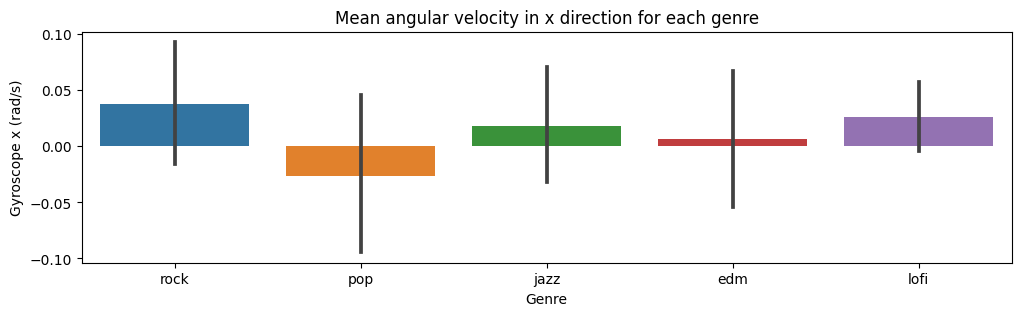

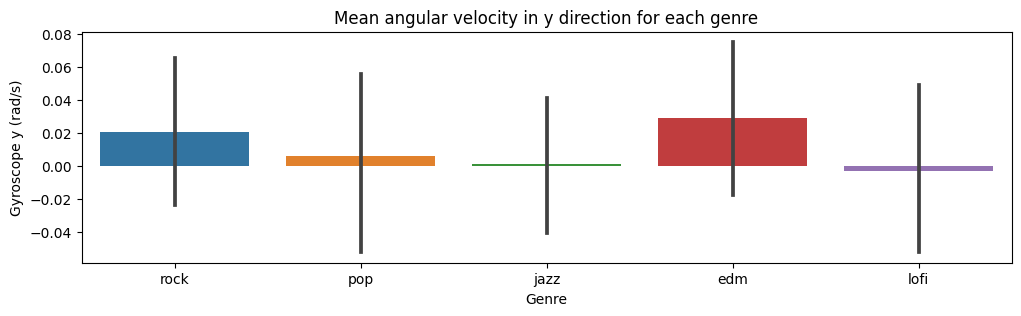

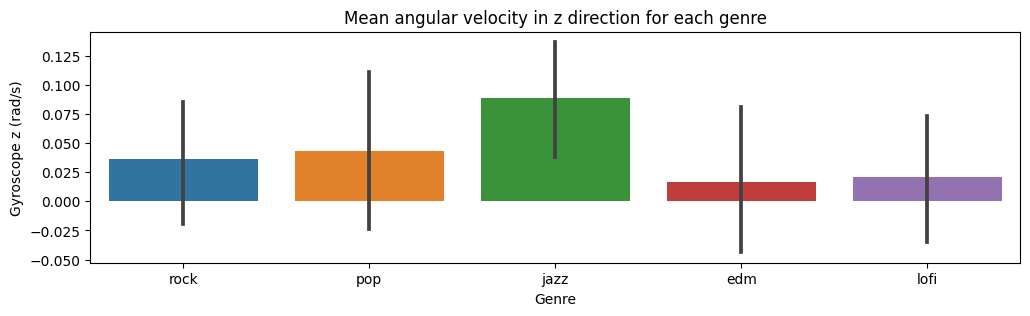

In [15]:
# mean of each genre for each feature plot

plt.figure(figsize=(12, 3))
sns.barplot(x=df['Genre'], y=df['Acceleration x (m/s^2)'])
plt.title('Mean acceleration in x direction for each genre')

plt.figure(figsize=(12, 3))
sns.barplot(x=df['Genre'], y=df['Acceleration y (m/s^2)'])
plt.title('Mean acceleration in y direction for each genre')

plt.figure(figsize=(12, 3))
sns.barplot(x=df['Genre'], y=df['Acceleration z (m/s^2)'])
plt.title('Mean acceleration in z direction for each genre')

plt.figure(figsize=(12, 3))
sns.barplot(x=df['Genre'], y=df['Gyroscope x (rad/s)'])
plt.title('Mean angular velocity in x direction for each genre')

plt.figure(figsize=(12, 3))
sns.barplot(x=df['Genre'], y=df['Gyroscope y (rad/s)'])
plt.title('Mean angular velocity in y direction for each genre')

plt.figure(figsize=(12, 3))
sns.barplot(x=df['Genre'], y=df['Gyroscope z (rad/s)'])
plt.title('Mean angular velocity in z direction for each genre')

plt.show()



### Kalman Filter

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18629 entries, 0 to 18628
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time (s)                18629 non-null  object 
 1   Acceleration x (m/s^2)  18629 non-null  float64
 2   Acceleration y (m/s^2)  18629 non-null  float64
 3   Acceleration z (m/s^2)  18629 non-null  float64
 4   Gyroscope x (rad/s)     18629 non-null  float64
 5   Gyroscope y (rad/s)     18629 non-null  float64
 6   Gyroscope z (rad/s)     18629 non-null  float64
 7   Genre                   18629 non-null  object 
 8   BPM                     18629 non-null  int64  
 9   Acceleration Net        18629 non-null  float64
 10  Gyro Net                18629 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 1.6+ MB


In [21]:
df_new_ = df[['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)',
           'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']]

In [22]:
df_new_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18629 entries, 0 to 18628
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Acceleration x (m/s^2)  18629 non-null  float64
 1   Acceleration y (m/s^2)  18629 non-null  float64
 2   Acceleration z (m/s^2)  18629 non-null  float64
 3   Gyroscope x (rad/s)     18629 non-null  float64
 4   Gyroscope y (rad/s)     18629 non-null  float64
 5   Gyroscope z (rad/s)     18629 non-null  float64
dtypes: float64(6)
memory usage: 873.4 KB


In [17]:
df_new = df[['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)',
           'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']].values
df_new

array([[-1.56338449e+00,  3.70348474e+00,  8.92786187e+00,
        -2.69162698e-01, -2.15996241e-01,  3.70114951e-02],
       [-8.32033698e-01,  2.61805881e+00,  9.15784832e+00,
        -2.75456182e-01,  3.00962047e-01, -7.58468652e-03],
       [-1.97800728e+00,  2.80923130e+00,  9.22369860e+00,
        -5.55871008e-02, -2.96234488e-01, -3.48594084e-01],
       ...,
       [ 6.39292038e-01,  4.48001970e+00,  8.73652908e+00,
         4.37414541e-02,  1.37521481e-01, -1.02915783e-02],
       [ 6.53660473e-01,  4.50364307e+00,  8.48632380e+00,
        -7.29022713e-02,  8.05554795e-03, -3.44071466e-02],
       [ 2.81669406e-01,  4.58338775e+00,  8.91593483e+00,
        -4.93041024e-02, -3.00711381e-01, -1.74200548e-01]])

In [23]:
# apply kalman filter outlier detection and replace the outliers with the mean of the column on df_new

import pykalman
from pykalman import KalmanFilter
import numpy as np

# Define Kalman filter model parameters
transition_matrix = np.eye(6)
observation_matrix = np.eye(6)
initial_state_mean = df_new[0]
initial_state_covariance = np.eye(6)
observation_covariance = np.eye(6)
transition_covariance = np.eye(6) * 0.01

# Create Kalman filter
kf = KalmanFilter(
    transition_matrices=transition_matrix,
    observation_matrices=observation_matrix,
    initial_state_mean=initial_state_mean,
    initial_state_covariance=initial_state_covariance,
    observation_covariance=observation_covariance,
    transition_covariance=transition_covariance
)

# Apply Kalman filter to the df_new
filtered_state_means, filtered_state_covariances = kf.filter(df_new)

# Calculate residuals
residuals = df_new - filtered_state_means

# Set threshold for outlier detection
threshold = 2.5  # Adjust according to your df_new and requirements

# Detect outliers
outliers = np.abs(residuals) > threshold

# Replace outliers with filtered values
replaced_df_new = np.where(outliers, filtered_state_means, df_new)

# Create a new df_newFrame with replaced values
replaced_df = pd.DataFrame(replaced_df_new, columns=df_new_.columns)

# Print the original df_newFrame, outliers, and replaced df_newFrame
print("Original df_newFrame:")
print(df_new_)
print("\nOutliers:")
print(outliers)
print("\nReplaced df_newFrame:")
print(replaced_df)





Original df_newFrame:
              Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
0      00:00:00.000000               -1.563384                3.703485   
1      00:00:00.250000               -0.832034                2.618059   
2      00:00:00.500000               -1.978007                2.809231   
3      00:00:00.750000               -1.394112                1.944860   
4      00:00:01.000000                1.404846                2.322332   
...                ...                     ...                     ...   
18624  00:14:00.250000                1.402597                4.288324   
18625  00:14:00.500000                0.938983                4.361283   
18626  00:14:00.750000                0.639292                4.480020   
18627  00:14:01.000000                0.653660                4.503643   
18628  00:14:01.250000                0.281669                4.583388   

       Acceleration z (m/s^2)  Gyroscope x (rad/s)  Gyroscope y (rad/s)  \
0             

In [30]:
replaced_df_new.dtypes

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [31]:
replaced_df['Acceleration Net'] = (replaced_df['Acceleration x (m/s^2)']**2 + replaced_df['Acceleration y (m/s^2)']**2 + replaced_df['Acceleration z (m/s^2)']**2)**0.5
replaced_df['Gyro Net'] = (replaced_df['Gyroscope x (rad/s)']**2 + replaced_df['Gyroscope y (rad/s)']**2 + replaced_df['Gyroscope z (rad/s)']**2)**0.5
replaced_df['Time (s)'] = df['Time (s)']

In [32]:
replaced_df['Genre'] = df['Genre']

Text(0.5, 1.0, 'Net acceleration after outlier replacement')

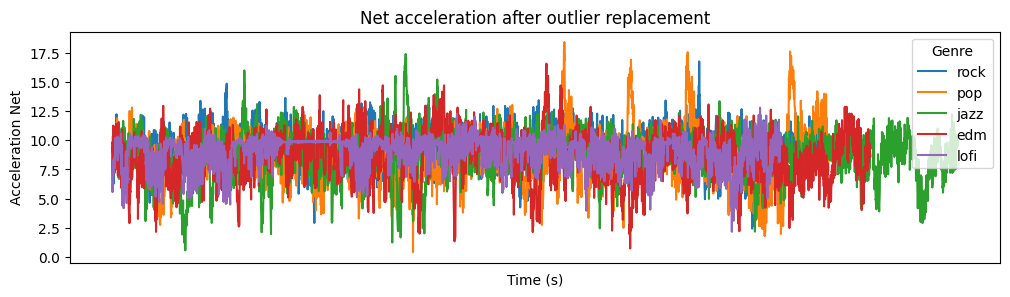

In [39]:
plt.figure(figsize=(12, 3))
sns.lineplot(x=replaced_df['Time (s)'], y=replaced_df['Acceleration Net'], hue=df_new_['Genre'])
plt.xticks([])
plt.gca().set_xticklabels([])
plt.title('Net acceleration after outlier replacement')

In [28]:
# no of true in the list of outliers
outliers.sum()


30010

Text(0.5, 1.0, 'Net angular velocity after outlier replacement')

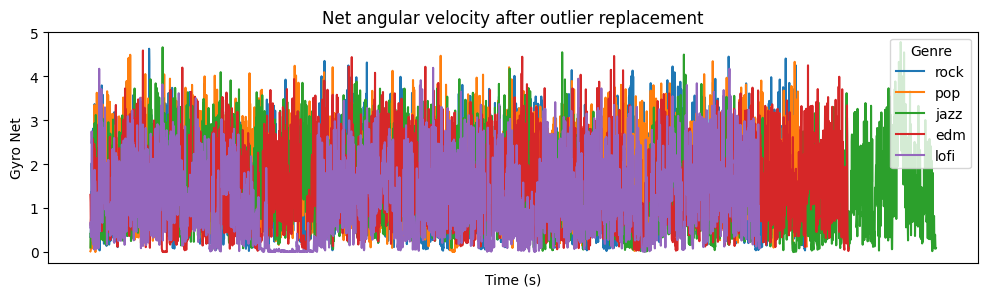

In [38]:
plt.figure(figsize=(12, 3))
sns.lineplot(x=replaced_df['Time (s)'], y=replaced_df['Gyro Net'], hue=df_new_['Genre'])
plt.xticks([])
plt.gca().set_xticklabels([])
plt.title('Net angular velocity after outlier replacement')